In [6]:
from sklearn.datasets import make_classification, make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
from kneed import KneeLocator
import seaborn as sns
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score, silhouette_score
from sklearn.metrics.cluster import rand_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.mixture import GaussianMixture


## Rand Score (Rand Index):

$$
RI = \frac{a + b}{a + b + c + d} = \frac{a + b}{\binom{n}{2}} = \frac{\text{Совпадающие пары}}{\text{Все возможные пары}} \\
$$

Оценивает, насколько пары точек, которые находятся в одном или разных кластерах в предсказанной кластеризации, соответствуют истинным меткам.

Диапазон: [0, 1]. 1 — идеальное совпадение, 0 — полное несоответствие.

Чувствителен к числу кластеров, не учитывает случайное совпадение

## Adjusted Rand Score (ARI):

Улучшенная версия Rand Index, корректирующая случайное совпадение. Сравнивает предсказанную кластеризацию с истинной, учитывая вероятность случайного распределения точек по кластерам.

Диапазон: [-1, 1]. 1 — идеальное совпадение, 0 — случайная кластеризация, -1 — хуже случайной.

## Silhouette Score:

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$

Оценивает, насколько каждая точка близка к своему кластеру и далека от других кластеров.

Диапазон: [-1, 1]. 1 — идеально разделенные кластеры, 0 — перекрытие кластеров, -1 — точки, возможно, попали в неправильный кластер.

Чувствителен к форме и плотности кластеров.

## alinski-Harabasz Score (CH Score):
Оценивает отношение дисперсии между кластерами к дисперсии внутри кластеров. Чем выше, тем лучше кластеры разделены.

$$
\begin{aligned}
CH &= \frac{\text{Tr}(B_k) / (k - 1)}{\text{Tr}(W_k) / (n - k)} \\[10pt]
\text{где:} \\
B_k &= \sum_{q=1}^k n_q (\mathbf{c}_q - \mathbf{c})(\mathbf{c}_q - \mathbf{c})^\top \quad \text{(межкластерная дисперсия)} \\
W_k &= \sum_{q=1}^k \sum_{x \in C_q} (x - \mathbf{c}_q)(x - \mathbf{c}_q)^\top \quad \text{(внутрикластерная дисперсия)}
\end{aligned}
$$

**Обозначения:**
- $k$ - количество кластеров
- $n$ - количество точек данных
- $n_q$ - количество точек в кластере $q$
- $\mathbf{c}_q$ - центроид кластера $q$
- $\mathbf{c}$ - глобальный центроид всех данных
- $\text{Tr}$ - след матрицы (сумма диагональных элементов)

Диапазон: [0, ∞). Высокие значения указывают на плотные и хорошо разделенные кластеры.

Чувствителен к числу кластеров; может быть завышен при большом их количестве.

In [ ]:
def print_metric(x, y, lable_y):
    print('Внешние метрики:')
    print('rand score', rand_score(y, lable_y))
    print('adjusted_rand_score', adjusted_rand_score(y, lable_y))
    print('Внутренние метрики:')
    print('silhouette_score: ', silhouette_score(x, lable_y))
    print('calinski_harabasz_score', calinski_harabasz_score(x, lable_y))

In [ ]:
X_class, y_class = make_classification(n_samples=200, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2, random_state=42)

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features

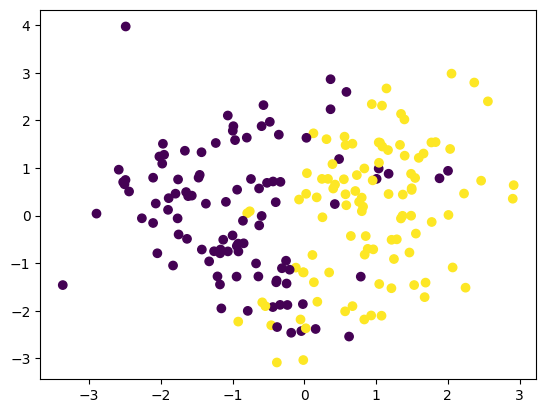

In [ ]:
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class)

In [ ]:
X_blobs, y_blobs = make_blobs(n_samples=200,n_features=4,centers=4,random_state=42)

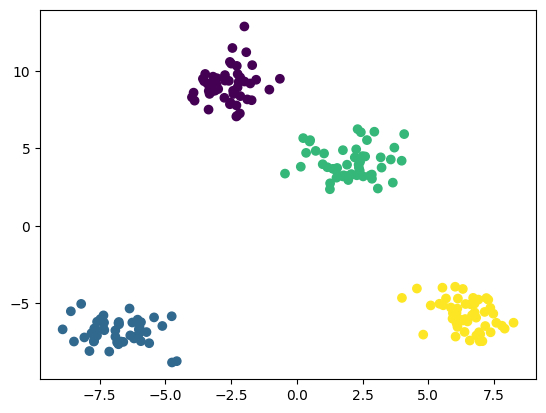

In [ ]:
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)

In [ ]:
data_cls = pd.read_csv('2dataset.csv')
data_cls = data_cls.sample(frac=0.1, random_state=42)
y_cls = data_cls['RainTomorrow']
X_cls = data_cls.drop(['RainTomorrow', 'Date', 'Location'], axis=1)

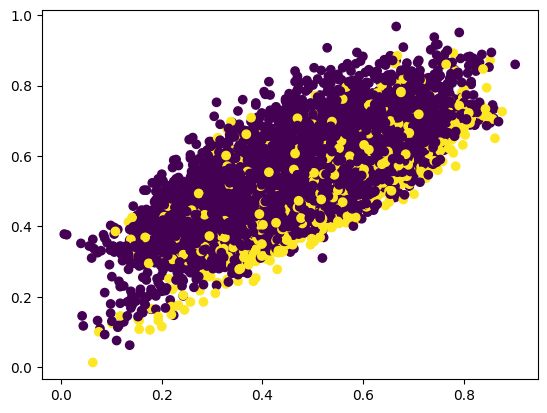

In [ ]:
plt.scatter(X_cls.values[:, 0], X_cls.values[:, 1], c=y_cls)

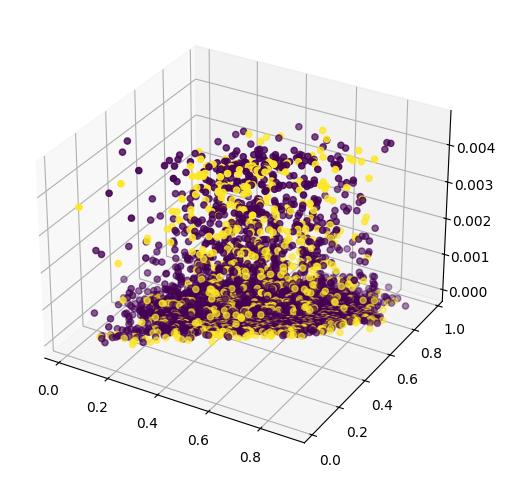

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_cls.iloc[:, 0], X_cls.iloc[:, 1], X_cls.iloc[:, 2], c=y_cls)

plt.show()

In [ ]:
X_class_scal = StandardScaler().fit_transform(X_class)
X_blobs_scal = StandardScaler().fit_transform(X_blobs)

In [ ]:
wcss_list_class = []
wcss_list_blobs = []
wcss_list_cls = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_class_scal)
    wcss_list_class.append(kmeans.inertia_)
    kmeans.fit(X_blobs_scal)
    wcss_list_blobs.append(kmeans.inertia_)
    kmeans.fit(X_cls)
    wcss_list_cls.append(kmeans.inertia_)

# k-means

Центроидная кластеризация.

Разбивает данные на k кластеров, минимизируя расстояния от точек до центроидов.

3


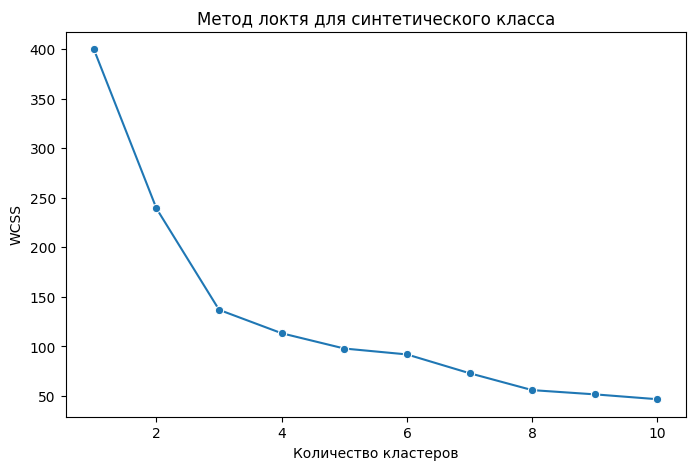

In [14]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=wcss_list_class, marker='o')
plt.title('Метод локтя для синтетического класса')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
kl = KneeLocator(range(1, 11), wcss_list_class, curve='convex', direction='decreasing')
print(kl.elbow)

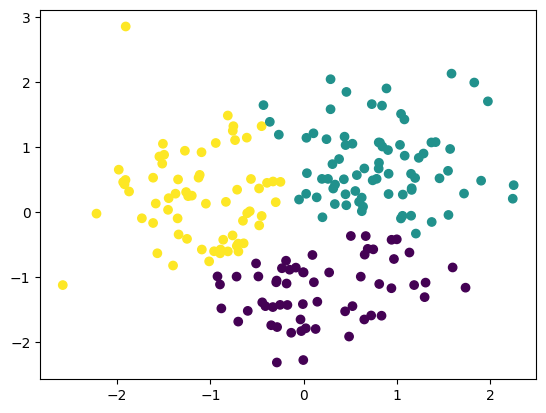

In [15]:
kmeans_class = KMeans(n_clusters=kl.elbow, random_state=42)
class_label = kmeans_class.fit_predict(X_class_scal)
plt.scatter(X_class_scal[:,0], X_class_scal[:,1], c=class_label)

In [16]:
print_metric(X_class_scal, y_class, class_label)

Внешние метрики:
rand score 0.6531155778894472
adjusted_rand_score 0.30506980934781036
Внутренние метрики:
silhouette_score:  0.43580060629321155
calinski_harabasz_score 189.14649766145422


4


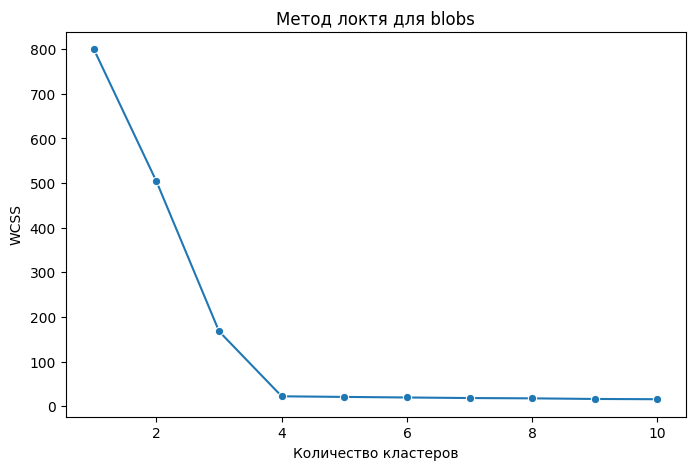

In [17]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=wcss_list_blobs, marker='o')
plt.title("Метод локтя для blobs")
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS")
kl = KneeLocator(range(1, 11), wcss_list_blobs, curve='convex', direction='decreasing')
print(kl.elbow)

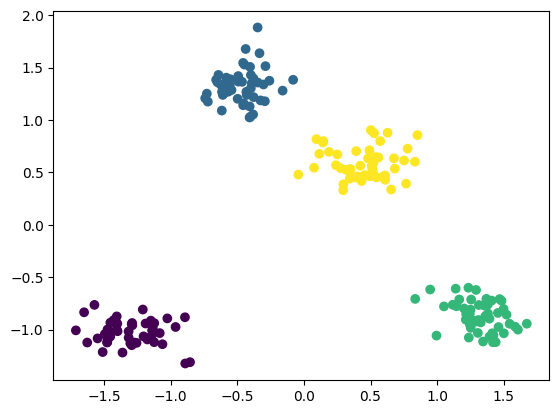

In [18]:
kmeans_blobs = KMeans(n_clusters=kl.elbow, random_state=42)
blobs_label = kmeans_blobs.fit_predict(X_blobs_scal)
plt.scatter(X_blobs_scal[:,0], X_blobs_scal[:,1], c=blobs_label)

In [19]:
print_metric(X_blobs_scal, y_blobs, blobs_label)

Внешние метрики:
rand score 1.0
adjusted_rand_score 1.0
Внутренние метрики:
silhouette_score:  0.8344732661173514
calinski_harabasz_score 2273.074234181938


3


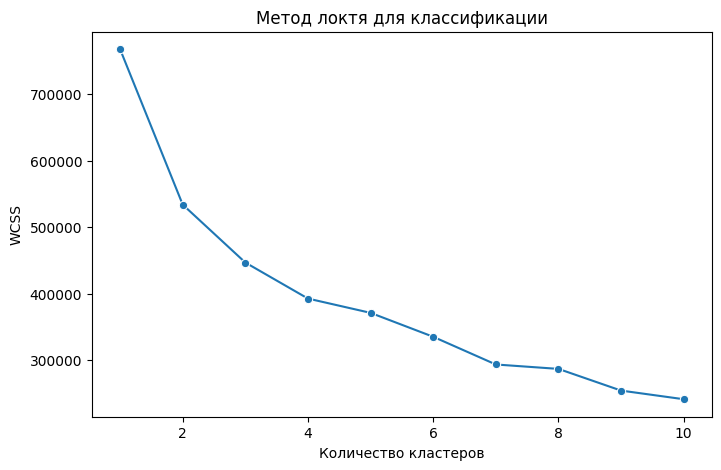

In [20]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=wcss_list_cls, marker='o')
plt.title('Метод локтя для классификации')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
kl = KneeLocator(range(1, 11), wcss_list_cls, curve='convex', direction='decreasing')
print(kl.elbow)

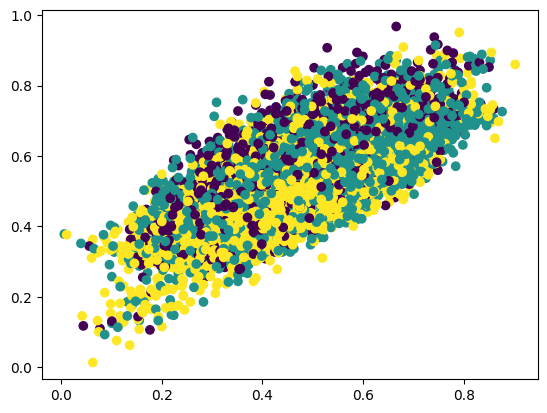

In [21]:
kmeans_cls = KMeans(n_clusters=kl.elbow, random_state=42)
cls_label = kmeans_cls.fit_predict(X_cls)
plt.scatter(X_cls.values[:,0], X_cls.values[:,1], c=cls_label)

In [22]:
print_metric(X_cls, y_cls, cls_label)

Внешние метрики:
rand score 0.44150530891671325
adjusted_rand_score 0.0039623080939757745
Внутренние метрики:
silhouette_score:  0.26233268786583497
calinski_harabasz_score 3117.8813441931197


# Иерархия

Древовидная.

Строит иерархию кластеров, объединяя или разделяя точки на основе расстояний.

Результат — дендрограмма, позволяющая выбрать уровень кластеризации.

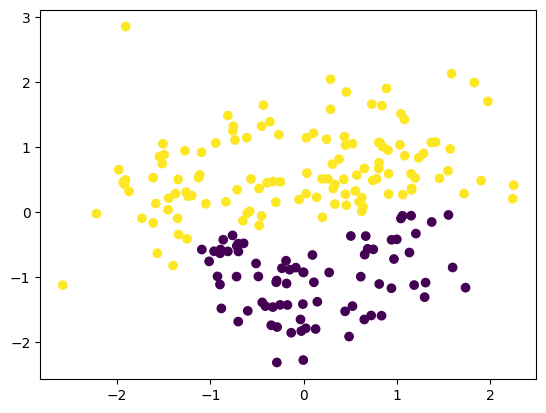

In [ ]:
class_hier = linkage(X_class_scal, method='ward')
class_label = fcluster(class_hier, t=2, criterion='maxclust')
plt.scatter(X_class_scal[:, 0], X_class_scal[:, 1], c=class_label)

Text(0, 0.5, 'Расстояние')

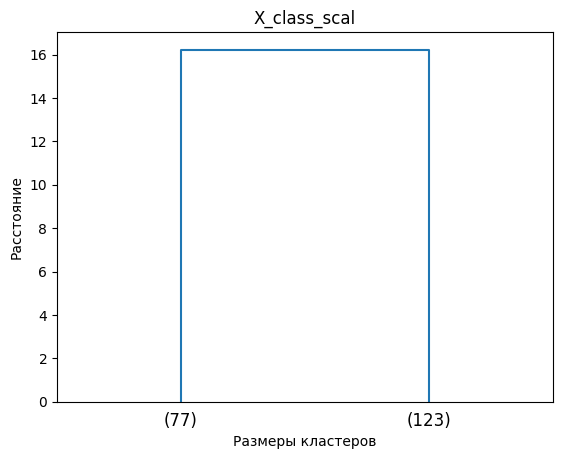

In [58]:
dendrogram(class_hier, truncate_mode='lastp', p=2, show_leaf_counts=True)
plt.title('X_class_scal')
plt.xlabel('Размеры кластеров')
plt.ylabel('Расстояние')

In [24]:
print_metric(X_class_scal, y_class, class_label)

Внешние метрики:
rand score 0.4999497487437186
adjusted_rand_score 0.0001413763696466954
Внутренние метрики:
silhouette_score:  0.3226003768784005
calinski_harabasz_score 97.1249408408425


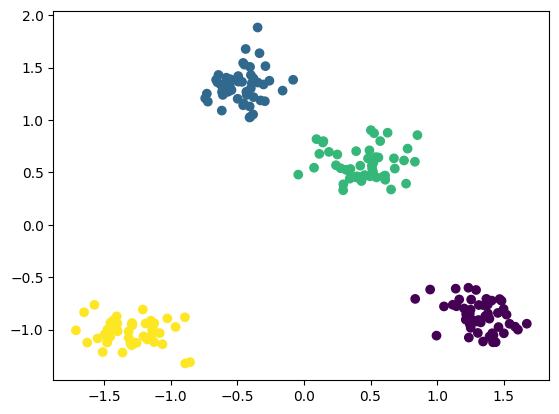

In [25]:
blobs_hier = linkage(X_blobs_scal, method='ward')
blobs_label = fcluster(blobs_hier, t=4, criterion='maxclust')
plt.scatter(X_blobs_scal[:, 0], X_blobs_scal[:, 1], c=blobs_label)

Text(0, 0.5, 'Расстояние')

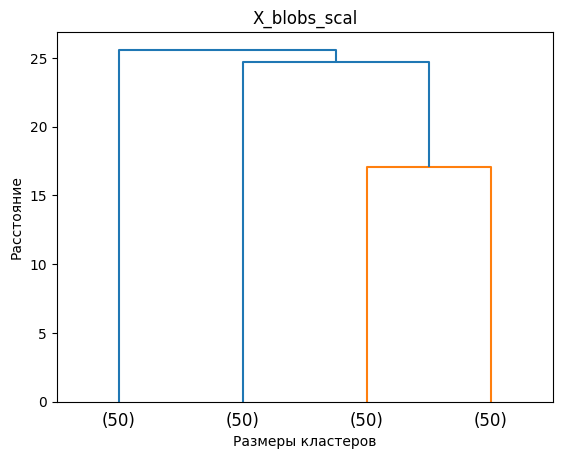

In [54]:
dendrogram(blobs_hier, truncate_mode='lastp', p=4, show_leaf_counts=True)
plt.title('X_blobs_scal')
plt.xlabel('Размеры кластеров')
plt.ylabel('Расстояние')

In [27]:
print_metric(X_blobs_scal, y_blobs, class_label)

Внешние метрики:
rand score 0.48809045226130654
adjusted_rand_score 0.000599478709878433
Внутренние метрики:
silhouette_score:  0.0026173045462034358
calinski_harabasz_score 1.0577435340506232


# DBSCAN

Плотностная кластеризация.

Группирует точки на основе их плотности, выделяя области высокой плотности как кластеры.

Автоматически определяет выбросы.

Требует параметры радиуса и минимальное число точек 

In [ ]:
def DBSCAN_fit(x):
    eps_values = np.linspace(0.1, 2.0, 20)
    min_samples_values = range(2, 10)

    best_score = -1
    best_params = {'eps': None, 'min_samples': None}

    for eps in eps_values:
        for min_samples in min_samples_values:
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(x)
            labels = db.labels_
            
            if len(np.unique(labels)) > 1 and (labels != -1).any():
                valid_labels = labels[labels != -1]
                valid_data = x[labels != -1]
                
                if len(np.unique(valid_labels)) >= 2:
                    score = silhouette_score(valid_data, valid_labels)
                    
                    if score > best_score:
                        best_score = score
                        best_params['eps'] = eps
                        best_params['min_samples'] = min_samples
    dbscan = DBSCAN(
    eps=best_params['eps'], 
    min_samples=best_params['min_samples']
    ).fit(x)
    print(best_params)
    return dbscan.labels_

{'eps': np.float64(0.2), 'min_samples': 8}


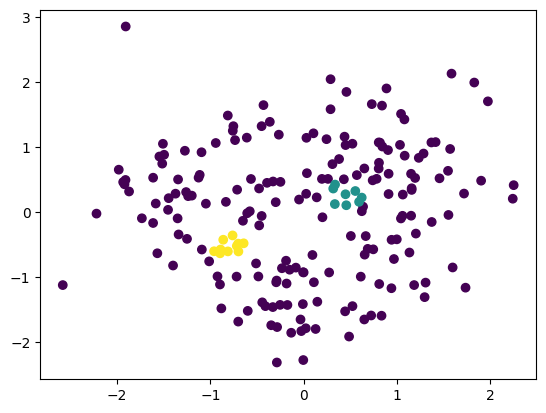

In [66]:
class_label = DBSCAN_fit(X_class_scal)
plt.scatter(X_class_scal[:,0], X_class_scal[:,1], c=class_label)

In [30]:
print_metric(X_class_scal, y_class, class_label)

Внешние метрики:
rand score 0.5013065326633166
adjusted_rand_score 0.005923557517099188
Внутренние метрики:
silhouette_score:  -0.32306560609744006
calinski_harabasz_score 2.9087530573312645


{'eps': np.float64(0.1), 'min_samples': 3}


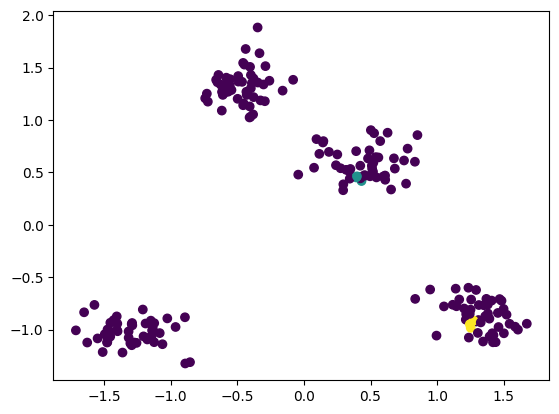

In [67]:
blobs_label = DBSCAN_fit(X_blobs_scal)
plt.scatter(X_blobs_scal[:,0], X_blobs_scal[:,1], c=blobs_label)

In [32]:
print_metric(X_blobs_scal, y_blobs, blobs_label)

Внешние метрики:
rand score 0.27683417085427137
adjusted_rand_score 0.0009481857313745867
Внутренние метрики:
silhouette_score:  -0.3461766413083092
calinski_harabasz_score 2.935007759411778


{'eps': np.float64(0.1), 'min_samples': 2}


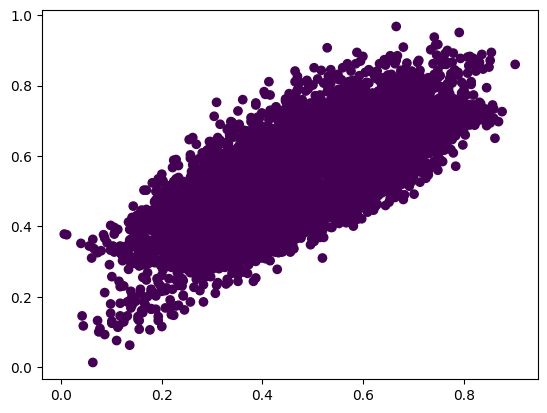

In [68]:
cls_label = DBSCAN_fit(X_cls)
plt.scatter(X_cls.values[:,0], X_cls.values[:,1], c=cls_label)

In [34]:
print_metric(X_cls, y_cls, cls_label)

Внешние метрики:
rand score 0.7331560825823205
adjusted_rand_score 6.046458698742893e-05
Внутренние метрики:
silhouette_score:  -0.3188554976736788
calinski_harabasz_score 1.813298193428518


# EM алгоритм

Вероятностная кластеризация.

Моделирует данные как смесь гауссовых распределений, итеративно оптимизируя параметры (мат. ожидание и дисперсию).

Число кластеров.

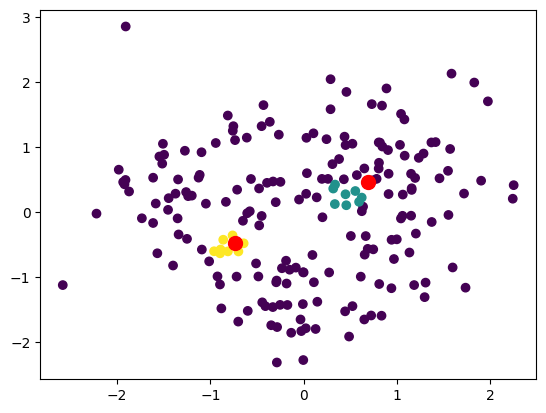

In [35]:
em_class = GaussianMixture(n_components=2).fit(X_class_scal)

class_labels = em_class.predict(X_class_scal)

plt.scatter(X_class_scal[:,0], X_class_scal[:,1], c=class_label)
plt.scatter(em_class.means_[:,0], em_class.means_[:,1],s=100, c='red')

In [36]:
print_metric(X_class_scal, y_class, class_label)

Внешние метрики:
rand score 0.5013065326633166
adjusted_rand_score 0.005923557517099188
Внутренние метрики:
silhouette_score:  -0.32306560609744006
calinski_harabasz_score 2.9087530573312645


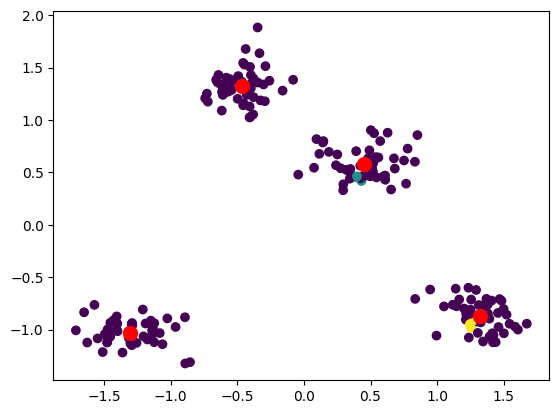

In [37]:
em_blobs = GaussianMixture(n_components=4).fit(X_blobs_scal)

blobs_labels = em_blobs.predict(X_blobs_scal)

plt.scatter(X_blobs_scal[:,0], X_blobs_scal[:,1], c=blobs_label)
plt.scatter(em_blobs.means_[:,0], em_blobs.means_[:,1],s=100, c='red')

In [38]:
print_metric(X_blobs_scal, y_blobs, blobs_label)

Внешние метрики:
rand score 0.27683417085427137
adjusted_rand_score 0.0009481857313745867
Внутренние метрики:
silhouette_score:  -0.3461766413083092
calinski_harabasz_score 2.935007759411778


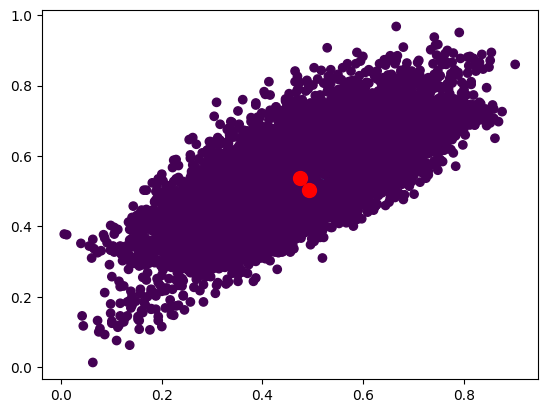

In [39]:
em_cls = GaussianMixture(n_components=2).fit(X_cls)

cls_labels = em_cls.predict(X_cls)

plt.scatter(X_cls.values[:,0], X_cls.values[:,1], c=cls_label)
plt.scatter(em_cls.means_[:,0], em_cls.means_[:,1],s=100, c='red')

In [40]:
print_metric(X_cls, y_cls, cls_labels)

Внешние метрики:
rand score 0.7171093401194234
adjusted_rand_score 0.11834137128337961
Внутренние метрики:
silhouette_score:  0.01137725371265509
calinski_harabasz_score 23.46844806392572


# Affinity Propagation

Кластеризация на основе передачи сообщений.

очки обмениваются «сообщениями», чтобы определить, какие из них станут «экземплярами».

Автоматически определяет количество кластеров на основе данных.

Использует матрицу сходства (обычно отрицательное евклидово расстояние).

Может переоценивать число кластеров.

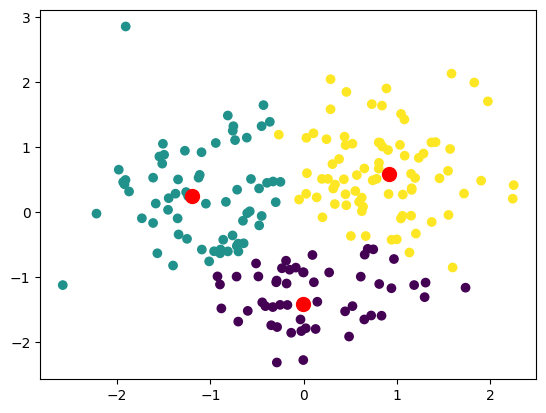

In [41]:
AF = AffinityPropagation(preference=-42, damping=0.9)
class_AP = AF.fit(X_class_scal)

plt.scatter(X_class_scal[:,0], X_class_scal[:,1], c=class_AP.labels_)
plt.scatter(class_AP.cluster_centers_[:,0], class_AP.cluster_centers_[:,1], s=100, c='red')

In [42]:
print_metric(X_class_scal, y_class, class_AP.labels_)

Внешние метрики:
rand score 0.6772361809045226
adjusted_rand_score 0.35342709534213285
Внутренние метрики:
silhouette_score:  0.43441084468637586
calinski_harabasz_score 186.75205760558765


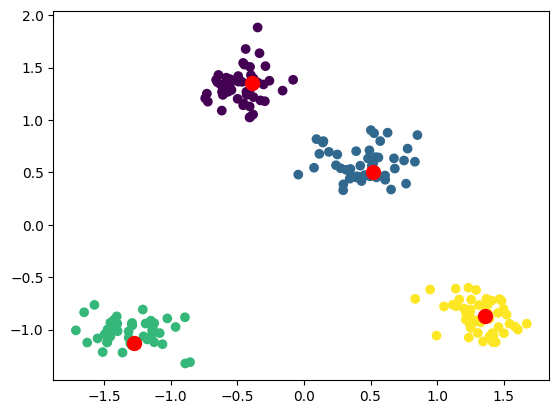

In [43]:
blobs_AP = AF.fit(X_blobs_scal)

plt.scatter(X_blobs_scal[:,0], X_blobs_scal[:,1], c=blobs_AP.labels_)
plt.scatter(blobs_AP.cluster_centers_[:,0], blobs_AP.cluster_centers_[:,1], s=100, c='red')

In [44]:
print_metric(X_blobs_scal, y_blobs, blobs_AP.labels_)

Внешние метрики:
rand score 1.0
adjusted_rand_score 1.0
Внутренние метрики:
silhouette_score:  0.8344732661173514
calinski_harabasz_score 2273.074234181938


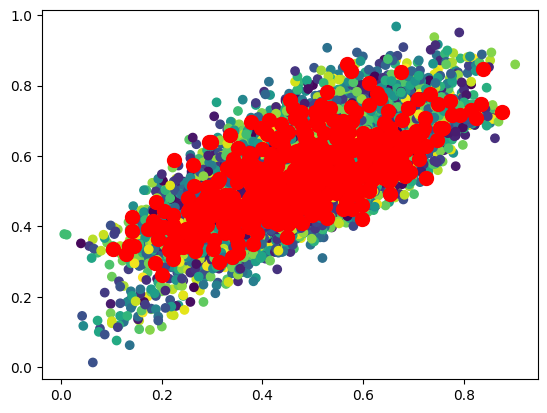

In [45]:
cls_AP = AF.fit(X_cls)

plt.scatter(X_cls.values[:,0], X_cls.values[:,1], c=cls_AP.labels_)
plt.scatter(cls_AP.cluster_centers_[:,0], cls_AP.cluster_centers_[:,1], s=100, c='red')

In [46]:
print_metric(X_cls, y_cls, cls_AP.labels_)

Внешние метрики:
rand score 0.26741187491197543
adjusted_rand_score 8.700851630690293e-05
Внутренние метрики:
silhouette_score:  0.1659319969022826
calinski_harabasz_score 332.63959567750607


# kmeanscustom

In [47]:
from kmeans_custom import KMeansCustom

kmeans = KMeansCustom(k=2, max_iter=100, random_state=42)
kmeans.fit(X_class_scal)
labels = kmeans.predict(X_class_scal)

print_metric(X_class_scal, y_class, class_labels)

Внешние метрики:
rand score 0.6440201005025126
adjusted_rand_score 0.2880236605582615
Внутренние метрики:
silhouette_score:  0.3822771205437688
calinski_harabasz_score 131.2272859418546


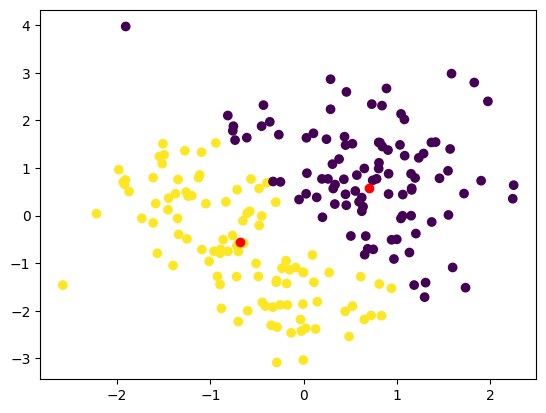

In [48]:
plt.scatter(X_class_scal[:, 0], X_class[:, 1], c=labels)
centroids = np.array(kmeans.centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o')

In [49]:
kmeans = KMeansCustom(k=4, max_iter=100, random_state=42)
kmeans.fit(X_blobs_scal)
labels = kmeans.predict(X_blobs_scal)

print_metric(X_blobs_scal, y_blobs, labels)

Внешние метрики:
rand score 0.8461809045226131
adjusted_rand_score 0.6343350107663466
Внутренние метрики:
silhouette_score:  0.5338873188080057
calinski_harabasz_score 248.16754921354038


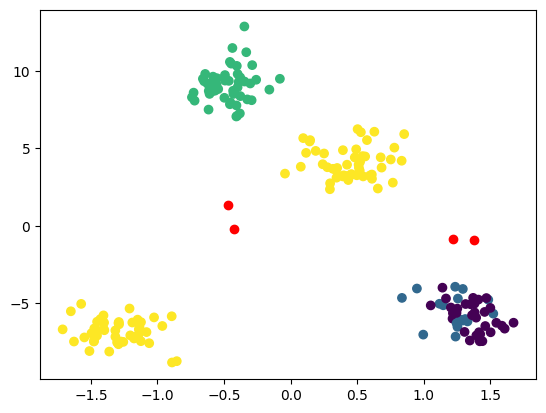

In [50]:
plt.scatter(X_blobs_scal[:, 0], X_blobs[:, 1], c=labels)
centroids = np.array(kmeans.centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o')

In [51]:
kmeans = KMeansCustom(k=2, max_iter=100, random_state=42)
kmeans.fit(X_cls)
labels = kmeans.predict(X_cls)

print_metric(X_cls, y_cls, labels)

Внешние метрики:
rand score 0.5001472506872955
adjusted_rand_score 0.00033734583640368786
Внутренние метрики:
silhouette_score:  0.2674398031696877
calinski_harabasz_score 3803.3089428983


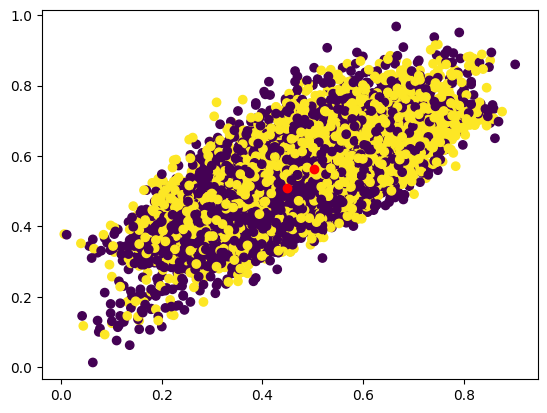

In [52]:
plt.scatter(X_cls.values[:, 0], X_cls.values[:, 1], c=labels)
centroids = np.array(kmeans.centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o')

## Синтетическая классификация

K-Means Custom — лучший выбор, так как показывает высокие значения по обеим метрикам.

Внешняя метрика: Adjusted Rand Score = 0.3813.

Внутренняя метрика: Silhouette Score = 0.3815.

## Синтетический blobs

Affinity Propagation или стандартный K-Means — лучший выбор, так как демонстрирует идеальные результаты по всем метрикам.

Внешняя метрика: Adjusted Rand Score = 1.0.

Внутренняя метрика: Silhouette Score = 0.8345.

## Датасет классификации

Показывают себя неплохо DBSCAN и  K-Means Custom

DBSCAN

Внешняя метрика: Adjusted Rand Score = 0.00006.

Внутренняя метрика: Silhouette Score = -0.3189.

K-Means Custom

Внешняя метрика: Adjusted Rand Score = 0.00034.

Внутренняя метрика: Silhouette Score = 0.2674.

K-Means Custom предпочтительнее, так как имеет положительный Silhouette Score и приемлемый Adjusted Rand Score.